In [1]:
%run -i 'cosim_import.py'
import csv

1.7.2.post289.dev0+g82128fb0
2.9.0


In [2]:
caseH = 18
%run -i 'cosim_setup_andes.py'

EVA: ts=18[H], 50000 EVs, Total Q=434.64 MWh
Online 14481, Q=361.83 MWh, SoC=0.7687
Power(MW): Pt=-39.9433, Pc=-39.9433, Pd=-0.0
Ctrl: 0=7778; 1=6703; 
EVA: Load A from Aest.csv.
Working directory: "/home/jwang175/andes/jwang/notes"
> Loaded config from file "/home/jwang175/.andes/andes.rc"
> Loaded generated Python code in "/home/jwang175/.andes/pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 6 processes.


Saved generated pycode to "/home/jwang175/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.3157 seconds.
Parsing input file "/home/jwang175/andes/jwang/case/ieee39_ev2.xlsx"...
Input file parsed in 0.1284 seconds.
ACEc <1> added BusFreq <BusFreq_11> linked to bus <1>
System internal structure set up in 0.0530 seconds.


In [3]:
%run -i 'cosim_setup_dispatch.py'
dc_comp.round(4)

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.1817 seconds.
0: |F(x)| = 7.561249598
1: |F(x)| = 2.917108301
2: |F(x)| = 0.1313043343
3: |F(x)| = 0.0003572409148
4: |F(x)| = 4.286928146e-09
Converged in 5 iterations in 0.0092 seconds.
Power flow results are consistent. Conversion is successful.


Restricted license - for non-production use only - expires 2023-10-25


-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.0160 seconds.
0: |F(x)| = 7.561249598
1: |F(x)| = 2.917108301
2: |F(x)| = 0.1313043343
3: |F(x)| = 0.0003572409148
4: |F(x)| = 4.286928146e-09
Converged in 5 iterations in 0.0138 seconds.
Power flow results are consistent. Conversion is successful.
GSF is consistent.
RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED limited: sfru, sfrd
RTED: total cost=4910.307


pp cost=2224.8754288341006, gb cost=4910.307428177317


,p_mw,q_mvar,va_degree,vm_pu,p_mw(GB)
0,1002.8172,90.1720,15.9217,1.0,1002.8172
1,646.0000,310.9533,1.9535,1.0,646.0000
2,290.0000,148.8141,-1.1572,1.0,290.0000
3,652.0000,129.6577,6.9360,1.0,652.0000
4,508.0000,145.0387,5.1048,1.0,508.0000
5,668.5448,225.0957,6.4636,1.0,668.5448
6,232.0000,60.4667,3.2560,1.0,232.0000
7,564.0000,-26.0077,13.4712,1.0,564.0000
8,865.0000,115.2992,15.9236,1.0,865.0000
9,-39.9433,0.0000,15.9236,1.0,-39.9433


In [21]:
sse = ev_ssm(ts=18, N=50000, step=1, tp=40,
             lr=0.1, lp=60, seed=2022, name="EVA")
sse.load_A("Aest.csv")

ridx = sse.ev.sample(frac=1, random_state=sse.seed).groupby('sx', sort=False).head(100).index

evagc = pd.DataFrame()
evsoc = pd.DataFrame()
evc = pd.DataFrame()
# evagc[0] = sse.ev.agc.copy()
# evsoc[0] = sse.ev.soc.copy()
# evc[0] = sse.ev.c.copy()
for i in range(1, 30):
    if i < 5:
        Pi=2+i
    else:
        Pi=-0.1*i
    sse.run(tf=18+i/3600, Pi=Pi,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=True)
#     evagc[i] = sse.ev.agc.copy()
#     evsoc[i] = sse.ev.soc.copy()
#     evc[i] = sse.ev.c.copy()
    evagc[i] = sse.ev.agc.iloc[ridx]
    evsoc[i] = sse.ev.soc.iloc[ridx]
    evc[i] = sse.ev.c.iloc[ridx]
evsoc.reset_index(inplace=True, drop=True)
evagc.reset_index(inplace=True, drop=True)
evc.reset_index(inplace=True, drop=True)

EVA: ts=18[H], 50000 EVs, Total Q=434.64 MWh
Online 14481, Q=361.83 MWh, SoC=0.7687
Power(MW): Pt=-39.9433, Pc=-39.9433, Pd=-0.0
Ctrl: 0=7778; 1=6703; 
EVA: Load A from Aest.csv.
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


EV_ 200 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


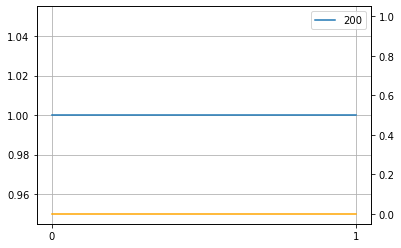

In [20]:
ev_idx = 200
print('EV_', ev_idx, ':', evagc.iloc[ev_idx].values)
fig, ax = plt.subplots()
evsoc.T.round(4).plot(y=[ev_idx], xticks=range(len(sse.tss)), ax=ax)
ax2 = ax.twinx()
# ax2.plot(range(30), evagc.iloc[ev_idx].values, color='orange')
ax2.plot(range(evc.shape[1]), evc.iloc[ev_idx].values, color='orange')
ax2.set_ylim([-0.05, 1.05])
ax.grid()

In [ ]:
evagc[evagc.sum(axis=1) >= 1].index

In [ ]:
pgf = pd.read_csv('cosim_18_F_pg.csv')
pgs = pd.read_csv('cosim_18_S_pg.csv')
agcf = pd.read_csv('cosim_18_F_agcm.csv')
agcs = pd.read_csv('cosim_18_S_agcm.csv')
outf = pd.read_csv('cosim_18_F_out.csv')
outs = pd.read_csv('cosim_18_S_out.csv')
evf = pd.read_csv('cosim_18_F_sse.csv')
evs = pd.read_csv('cosim_18_S_sse.csv')
evdf = pd.read_csv('cosim_18_F_evdata.csv')
evds = pd.read_csv('cosim_18_S_evdata.csv')

sfrf = pd.read_csv('cosim_18_F_sfr.csv')
sfrs = pd.read_csv('cosim_18_S_sfr.csv')

evagcf = pd.read_csv('cosim_18_F_evagc.csv').T
evsocf = pd.read_csv('cosim_18_F_evsoc.csv').T
evsocf.sort_values(by=['0'], axis=1, inplace=True)
evagcs = pd.read_csv('cosim_18_S_evagc.csv').T
evsocs = pd.read_csv('cosim_18_S_evsoc.csv').T
evsocs.sort_values(by=['0'], axis=1, inplace=True)

reader = csv.reader(open('cosim_18_F_rted.csv', 'r'))
rted_res = {}
for row in reader:
   k, v = row
   rted_res[k] = v

In [ ]:
import matplotlib.font_manager

In [ ]:
# --- read load from ssa ---
ptotal = ssa.PQ.as_df()['p0'].sum()
print('ANDES total load is:',ptotal.round(4),'p.u.')

# --- scale load curve ---
ddata_path = '/case/dsyn.csv'
ddata = dir_path + ddata_path
d_syn = pd.read_csv(ddata)

# the coefficient can be adjusted to fit the case
if caseH == 10:
    d_syn['sload'] = 0.8*(d_syn['ha10'] - d_syn['ha10'].min()) / d_syn['ha10'].min() + 0.7
if caseH == 18:
    d_syn['sload'] = 0.8*(d_syn['ha18'] - d_syn['ha18'].min()) / d_syn['ha18'].min() + 0.7

# extensify load fluctuation
avg = d_syn['sload'].rolling(50).mean()
d_syn['sload'] = 15 * (d_syn['sload'] - avg) + avg
d_syn['sload'] *= ptotal * ssa.config.mva

# calculate expected load
step = 300
d_exp = d_syn.groupby(d_syn.index // step).mean().copy()
d_exp['time'] = range(0,3600,300)

# align starting point of load with starting point of dispatch results
d_syn['sload'][0] = d_exp['sload'].iloc[0]
d_syn['sload'][1:100] = None
d_syn['sload'] = d_syn['sload'].interpolate(method='polynomial', order=3)

plt.style.use('ieee')
# --- plot load curve ---
fig_load, ax_load = plt.subplots(figsize=(3.5, 3))
ax_load.plot(d_syn['time'], d_syn['sload'], linestyle='-')
ax_load.set_xlim([0, 3600])
ax_load.set_ylabel('Active power [MW]')
ax_load.set_xlabel('Time [s]')
ax_load.grid()
plt.tight_layout()
fig_load.savefig("load_curve.png", bbox_inches="tight")

plt.style.use('ieee')
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))

ax.plot(3600*(np.array(evs.time)-18), evs['ne'])
ax.set_xlim([0, 3600])
ax.set_xlabel('Time [s]')
ax.set_ylabel('Numbers')
ax.grid()

In [ ]:
noagcev = evagcf.abs().sum() == 0
noagcev = noagcev[noagcev].index
noagcev

In [ ]:
evagcf.sum(axis=1).max()

In [ ]:
xlim = [0, 3600]
evid = 2
print(evagcf[evid].abs().sum())
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(range(3600), evagcf[evid])
ax[0].set_xlim(xlim)
evsocf.plot(x='time', y=[evid], fig=fig, ax=ax[1], xlim=xlim)

In [ ]:
col_index = []
for k in range(0, 16):
    col_index = col_index + [list(np.array([7]) + 100*k)]
col_index
col = []
for c in col_index:
    col = col + [list(evsocf.columns[[c]].values)]

fig, ax = plt.subplots(2, 4, figsize=(16, 6))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.25, hspace=0.35)

for i in range(2):
    for j in range(4):
        idx = 15 - (4*i + j)
        ax[i, j].plot(range(3600), evsocs[col[idx][0]], linestyle='-', color='tab:blue', label=f'Case1 EV_{col[idx][0]}')
#         ax[i, j].plot(range(3600), evsocs[col[idx][1]], linestyle='--', color='tab:blue', label=f'Case1 EV{col[idx][1]}')
        ax[i, j].plot(range(3600), evsocf[col[idx][0]], linestyle='-', color='tab:orange', label=f'Case2 EV_{col[idx][0]}')
#         ax[i, j].plot(range(3600), evsocf[col[idx][1]], linestyle='--', color='tab:orange', label=f'Case2 EV{col[idx][1]}')
        ax[i, j].legend()
        ax[i, j].set_xlim([0, 3600])
        ax[i, j].set_xlabel('Time [s]')
        ax[i, j].set_ylabel('SOC [%]')
        yticks = list(ax[i, j].get_yticks())
        ax[i, j].set_yticks(yticks[0:-1], [np.round(ytk*100, 4) for ytk in yticks[0:-1]])
        ax[i, j].set_title(f'SOC level {idx + 5}')
#         ax[i, j].set_ylim([0.58, 1.02])

In [ ]:
epsilon = 18
k = 10 * ssa.ACEc.bias.v / epsilon / epsilon # mHz
length = 60

outscp = outs.copy()
outscp['Time'] = outscp['Time'] / length
outscp['Time'] = outscp['Time'].astype(int)
outscp = outscp.groupby('Time').mean()
outscp['prod'] = 100* (2 - k * outscp['ACE'] * outscp['fd'])

outfcp = outs.copy()
outfcp['Time'] = outfcp['Time'] / length
outfcp['Time'] = outfcp['Time'].astype(int)
outfcp = outfcp.groupby('Time').mean()
outfcp['prod'] = 100* (2 - k * outfcp['ACE'] * outfcp['fd'])

fig, ax = plt.subplots(figsize=(3.5, 3))
outscp.plot(y='prod', kind='kde', color='tab:blue', linestyle='-',
            legend=False, linewidth=1, fig=fig, ax=ax, label='Case1')
outfcp.plot(y='prod', kind='kde', color='tab:orange', linestyle='--',
            legend=False, linewidth=1, fig=fig, ax=ax, label='Case2')
ax.legend()
ax.set_xlabel('CPS1')
# outscp.plot(y='prod', kind='hist', density=True, bins=30, color='tab:blue',
#             legend=False, fig=fig, ax=ax, label='Case1')
# outfcp.plot(y='prod', kind='hist', density=True, bins=30, color='tab:orange',
#             legend=False, fig=fig, ax=ax, label='Case2')

In [ ]:
import matplotlib.font_manager

In [ ]:
# --- generation cost ---
gtf = 0
gts = 0
for i in pgf.index:
    cf = ssd.cost.c2.values * np.power(pgf.loc[i].values, 2) \
        + ssd.cost.c1.values * pgf.loc[i].values \
        + ssd.cost.c1.values
    cs = ssd.cost.c2.values * np.power(pgs.loc[i].values, 2) \
        + ssd.cost.c1.values * pgs.loc[i].values \
        + ssd.cost.c1.values
    gtf += np.sum(cf)
    gts += np.sum(cs)

# --- SFR mileage cost ---
ftf = 0
fts = 0
for i in agcf.columns:
    cf = ssd.cost.c1.abs().values * agcf[i].values
    cs = ssd.cost.c1.abs().values * agcs[i].values
    ftf += np.sum(cf)
    fts += np.sum(cs)

print(f"EV AGC Mile: case1: {agcf.loc[9].sum()}, case2: {agcs.loc[9].sum()}")
print(f"Total cost: Case 2={np.round(gtf+ftf, 2)}, Case 1={np.round(gts+fts, 2)}")

In [ ]:
import matplotlib.font_manager

In [ ]:
plt.style.use('ieee')
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.18, hspace=None)


ax[2].plot(3600*(np.array(evs.time)-18), evs.Prc, label='Case1 EV AGC response', linestyle='-', color='tab:blue')
ax[2].plot(3600*(np.array(evs.time)-18), evf.Prc, label='Case2 EV AGC response', linestyle='-', color='tab:orange')
ax[2].plot(3600*(np.array(evs.time)-18), evs.Pt, label='Case1 EV total output', linestyle='--', color='tab:blue')
ax[2].plot(3600*(np.array(evs.time)-18), evf.Pt, label='Case2 EV total output', linestyle='--', color='tab:orange')
ax[2].legend()
ax[2].set_xlim([0, 3600])
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('EV output power [MW]')

sfrs.plot(x='time', y='ace', ax=ax[0], fig=fig, label='Case1', linestyle='-', color='tab:blue')
sfrf.plot(x='time', y='ace', ax=ax[0], fig=fig, label='Case2', linestyle='-', color='tab:orange')
sfrs.plot(x='time', y='up', ax=ax[0], fig=fig, label='RegUp limit', linestyle='--', color='black')
sfrs.plot(x='time', y='dn', ax=ax[0], fig=fig, label='RegDn limit', linestyle='--', color='black')
ax[0].set_xlim([0, 3600])
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Total AGC signal [MW]')

outs.plot(x='Time', y='paux9', ax=ax[1], fig=fig, label='Case1', linestyle='-', color='tab:blue')
outf.plot(x='Time', y='paux9', ax=ax[1], fig=fig, label='Case2', linestyle='-', color='tab:orange')
ax[1].set_xlim([0, 3600])
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('G9 AGC response [MW]')

In [ ]:
outf['fd'] = outf['freq'] - 60
outs['fd'] = outs['freq'] - 60

plt.style.use('ieee')
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.18, hspace=None)
# ACE
outs.plot(x='Time', y='ACE', ax=ax[0], fig=fig, label='Case1', linestyle='-', color='tab:blue')
outf.plot(x='Time', y='ACE', ax=ax[0], fig=fig, label='Case2', linestyle='-', color='tab:orange')
# COI freq.
outs.plot(x='Time', y='freq', ax=ax[1], fig=fig, label='Case1', linestyle='-', color='tab:blue')
outf.plot(x='Time', y='freq', ax=ax[1], fig=fig, label='Case2', linestyle='-', color='tab:orange',)
# COI std.
outs.plot(x='Time', y='fd', kind='hist', density=True, bins=30, color='tab:blue',
          legend=False, linewidth=1, fig=fig, ax=ax[2], label='Case1')
outf.plot(x='Time', y='fd', kind='hist', density=True, bins=30, color='tab:orange',
          legend=False, linewidth=1, fig=fig, ax=ax[2], label='Case2')
# outs.plot(x='Time', y='fd', kind='kde', color='tab:blue',
#           legend=False, fig=fig, ax=ax[2], label='Case1')
# outf.plot(x='Time', y='fd', kind='kde', color='tab:orange',
#           legend=False, fig=fig, ax=ax[2], label='Case2')

ax[0].set_xlim([0, 3600])
ax[1].set_xlim([0, 3600])
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
ax[0].set_ylabel('ACE [MW]')
ax[1].set_ylabel('Freq. [Hz]')
ax[2].set_xlabel('Freq. Deviation [Hz]')
ax[2].set_ylabel('Density')
ax[2].legend()

print(f"Case1: Freq. D. {outs['fd'].std()}, Case2: {outf['fd'].std()}")
print(f"Case1: ACE D. {outs['ACE'].std()}, Case2: {outf['ACE'].std()}")

In [ ]:
plt.style.use('ieee')

bu_df = pd.read_csv('cosim_18_S_bu.csv')
bd_df = pd.read_csv('cosim_18_S_bd.csv')

color = ['tab:blue', 'yellow', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown',
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange']

figs, axes = plt.subplots(1, 2, figsize=(10.5, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.38, hspace=None)
new_cols = ['PV_1', 'PV_2', 'PV_3', 'PV_4', 'PV_5', 'PV_6',
            'PV_7', 'PV_8', 'PV_9', 'Slack_10', 'PV_10']
bu_df[new_cols].plot.bar(stacked=True, ax=axes[0], legend=False, color=color)
bd_df[new_cols].plot.bar(stacked=True, ax=axes[1], legend=False, color=color)

for ax in axes:
    ax.tick_params(axis='x', labelrotation = 0)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])
    ax.set_xticklabels([i for i in range(1,13,1)])
    ax.set_xlabel('RTED interval')
axes[0].set_title('(a) Case 1: RegUp balancing factor')
axes[1].set_title('(b) Case 1: RegDn balancing factor')
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
line_plot = lines[0:11]
line_plot.reverse()
label_g = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'EV']
label_g.reverse()
figs.legend(line_plot, label_g, loc='center')

In [ ]:
plt.style.use('ieee')

bu_df = pd.read_csv('cosim_18_F_bu.csv')
bd_df = pd.read_csv('cosim_18_F_bd.csv')

color = ['tab:blue', 'yellow', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown',
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange']

figs, axes = plt.subplots(1, 2, figsize=(10.5, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.38, hspace=None)
new_cols = ['PV_1', 'PV_2', 'PV_3', 'PV_4', 'PV_5', 'PV_6',
            'PV_7', 'PV_8', 'PV_9', 'Slack_10', 'PV_10']
bu_df[new_cols].plot.bar(stacked=True, ax=axes[0], legend=False, color=color)
bd_df[new_cols].plot.bar(stacked=True, ax=axes[1], legend=False, color=color)

for ax in axes:
    ax.tick_params(axis='x', labelrotation = 0)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])
    ax.set_xticklabels([i for i in range(1,13,1)])
    ax.set_xlabel('RTED interval')
axes[0].set_title('(c) Case 2: RegUp balancing factor')
axes[1].set_title('(d) Case 2: RegDn balancing factor')
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
line_plot = lines[0:11]
line_plot.reverse()
label_g = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'EV']
label_g.reverse()
figs.legend(line_plot, label_g, loc='center')